# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#Build query URL
query_url=url + "appid=" + weather_api_key + "&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | settat
Processing Record 3 of Set 1 | robertsport
Processing Record 4 of Set 1 | berbera
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | tazovsky
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | markovo
Processing Record 17 of Set 1 | stettler
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | port mathurin
Processing 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,300.04,86,98,8.77,MH,1713818069
1,settat,33.0007,-7.6204,290.05,71,71,4.89,MA,1713818360
2,robertsport,6.7533,-11.3686,301.31,84,100,5.04,LR,1713818363
3,berbera,10.4396,45.0143,303.04,75,13,2.17,SO,1713818139
4,bethel,41.3712,-73.4140,289.46,34,0,3.09,US,1713817948


In [14]:
#Output Directory setup
output_file = "../WeatherPy/cities.csv"


# Export the City_Data into a csv
city_data_df.to_csv(output_file, index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,300.04,86,98,8.77,MH,1713818069
1,settat,33.0007,-7.6204,290.05,71,71,4.89,MA,1713818360
2,robertsport,6.7533,-11.3686,301.31,84,100,5.04,LR,1713818363
3,berbera,10.4396,45.0143,303.04,75,13,2.17,SO,1713818139
4,bethel,41.3712,-73.4140,289.46,34,0,3.09,US,1713817948


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

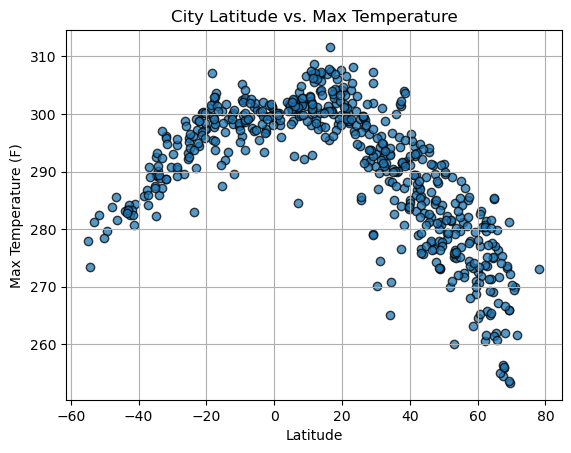

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

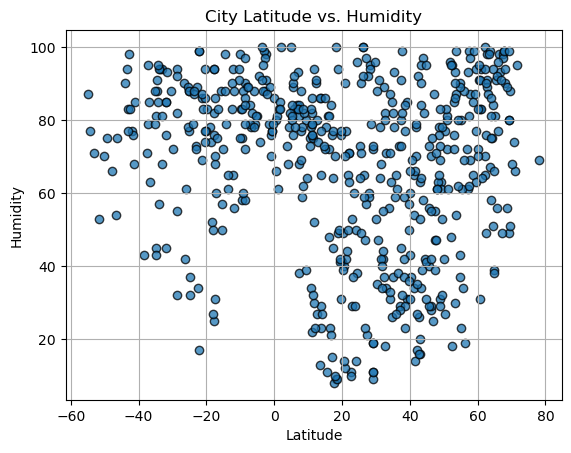

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

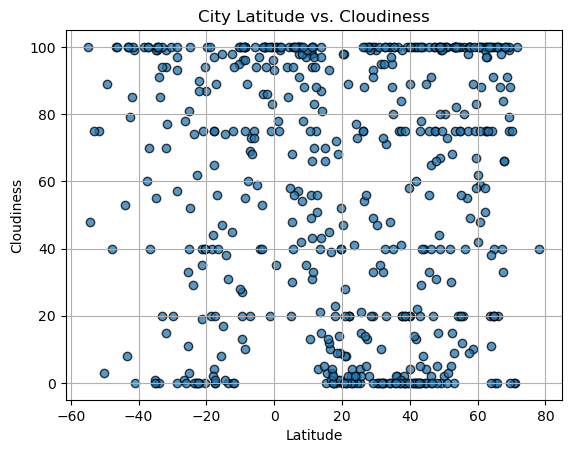

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

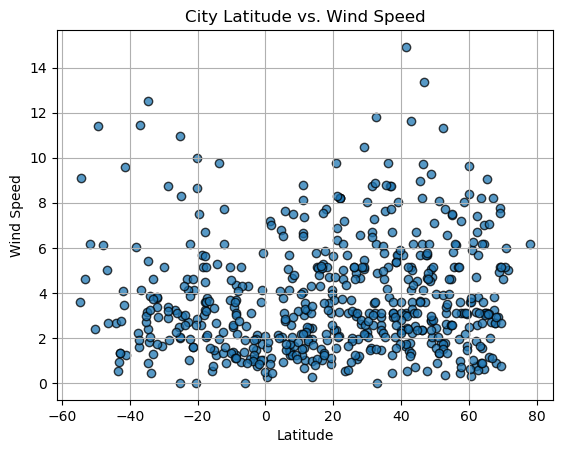

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def lin_reg(df, y_value):
# Scatter plot
    plt.scatter(df['Lat'], df[y_value])
    plt.title("Latitude vs " + y_value)
    plt.xlabel("Latitude")
    plt.ylabel(y_value)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df['Lat'], df[y_value])
    
    # Plot regression line
    plt.plot(df['Lat'], slope * df['Lat'] + intercept, color='red')
    
    # Add equation of the line
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-value = {r_value:.2f}"
    plt.annotate(line_eq, (df['Lat'].min(), df[y_value].max()), fontsize=12, color="red")
    
    
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,300.04,86,98,8.77,MH,1713818069
1,settat,33.0007,-7.6204,290.05,71,71,4.89,MA,1713818360
2,robertsport,6.7533,-11.3686,301.31,84,100,5.04,LR,1713818363
3,berbera,10.4396,45.0143,303.04,75,13,2.17,SO,1713818139
4,bethel,41.3712,-73.4140,289.46,34,0,3.09,US,1713817948


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
9,margaret river,-33.9500,115.0667,285.87,57,91,3.86,AU,1713817955
10,geraldton,-28.7667,114.6000,290.38,55,97,8.75,AU,1713818209
11,west island,-12.1568,96.8225,300.14,94,75,7.72,CC,1713818018
12,blackmans bay,-43.0167,147.3167,283.44,83,100,1.34,AU,1713818005
13,bredasdorp,-34.5322,20.0403,289.26,91,99,0.89,ZA,1713817946


###  Temperature vs. Latitude Linear Regression Plot

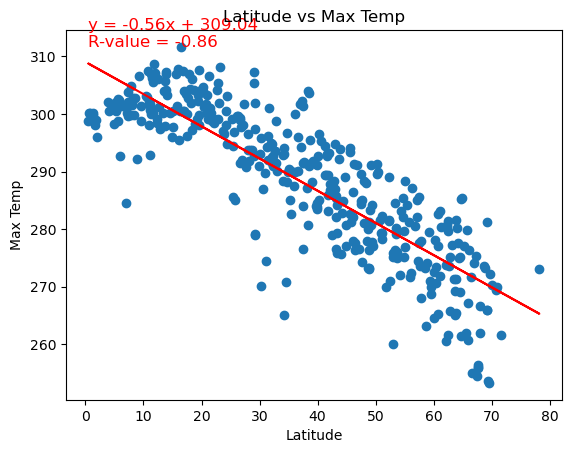

In [56]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df, "Max Temp")

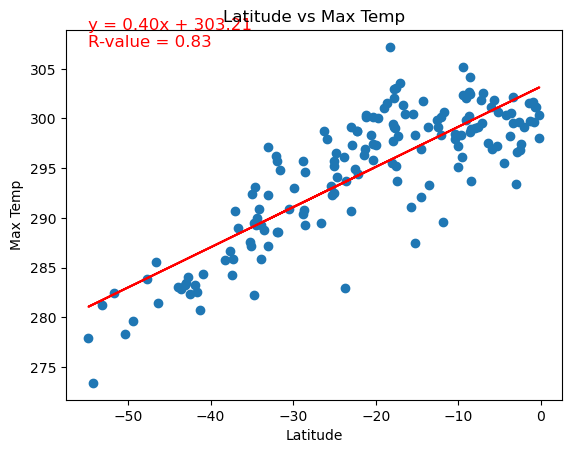

In [57]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, "Max Temp")

**Discussion about the linear relationship:** There is a negative relationship between latitude and max temp in the northern hemisphere. As
the latitude increases, the temperature decreases. This is the inverse for the southern hemisphere. At the latitude increases, the max temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

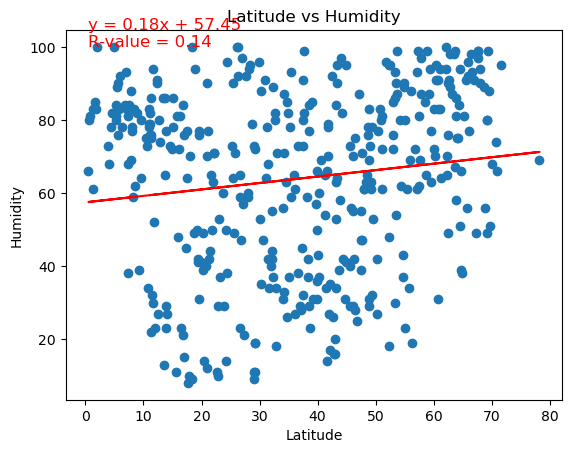

In [58]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Humidity")

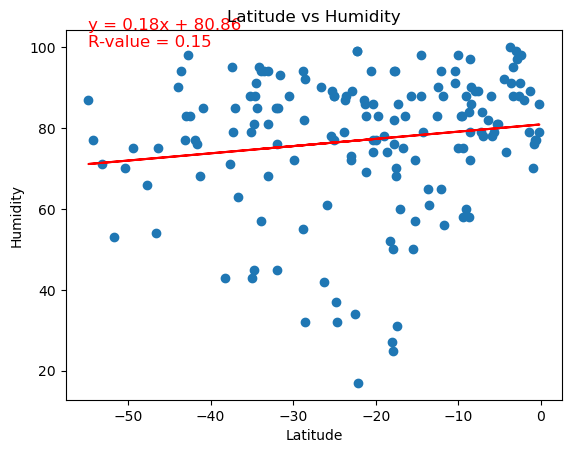

In [59]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Humidity")

**Discussion about the linear relationship:** Give the data above, there is no correlation that can be drawn regarding humidity and latitude with the given R-values. 

### Cloudiness vs. Latitude Linear Regression Plot

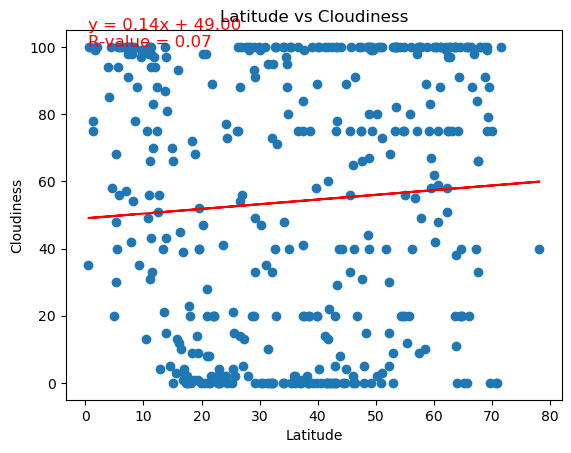

In [62]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Cloudiness")

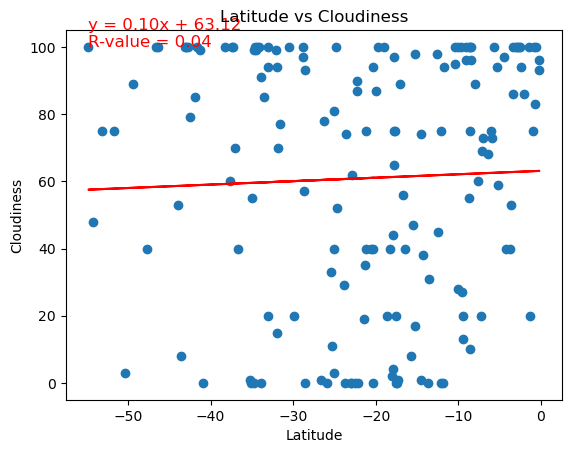

In [61]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Cloudiness")

**Discussion about the linear relationship:** Give the data above, there is no correlation that can be drawn regarding cloudiness and latitude with the given R-values. 

### Wind Speed vs. Latitude Linear Regression Plot

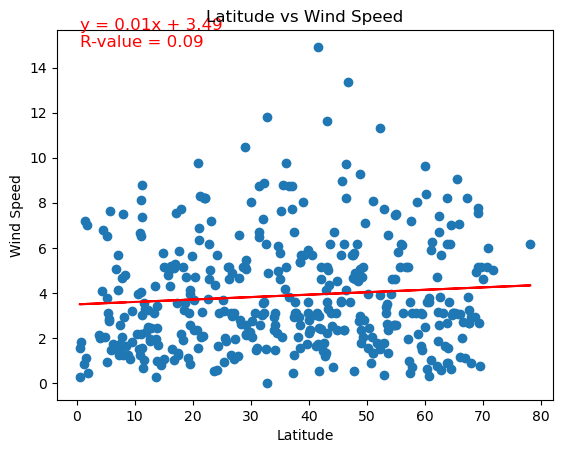

In [63]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Wind Speed")

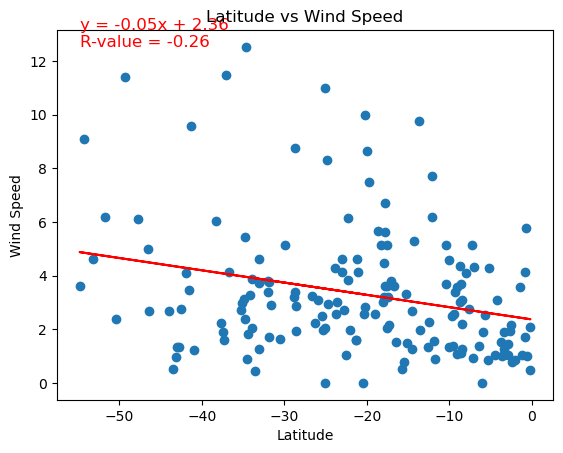

In [64]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Wind Speed")

**Discussion about the linear relationship:** Give the data above, there is no correlation that can be drawn regarding wind speed and latitude with the given R-values. 